# Problem Set 7

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.ticker import MultipleLocator

from scipy.optimize import minimize


# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

%load_ext autoreload
%autoreload 2

## Problem 1

\begin{align*}
f(t,T) &= f_\infty + \sum_{k=0}a_k (T-t)^k e^{-b_k (T-t)}, \qquad b_j >0 \\
&= f_\infty + a_0 e^{-b_0 (T-t)} + a_1 (T-t) e^{-b_1 (T-t)} + a_2 (T-t)^2 e^{-b_2 (T-t)} + a_3 (T-t)^3 e^{-b_3 (T-t)} + \dots \\
\end{align*}

Tend to f-infinity as $T \to \infty$ as the sum reduces in time.

Vasicek and CIR has only 3 parameters giving (possibly) horrible fit to the data. This model has is more flexible.
Downside w. Nelson-Siegel. It is more differentiable to upper case T and flexible but is more restrictive in the functional form.

# Problem 2

In this problem, we will consider the Ho-Lee model in which the short rate under the risk neutral measure $\mathbb{Q}$ has dynamics

\begin{align*}
dr_t = \theta_t dt + \sigma dW_t
\end{align*}

Our objective will be to fit the Ho-Lee model to observed forward rates extracted from the market. So, assume that we observe the forward rates given in the vector f star in the file `homework 7.py` for the maturities in the vector $T$ from that same file and denote these observed forward rates by $f^*$. Also assume that $\sigma = 0.03$. To estimate $\theta(t)$ in the Ho-Lee model, we will fit a Nelson-Siegel type function $f(t,T)$ to the observed prices $f^*$

\begin{align*}
f(t,T) = f_\infty + \sum_{k=0}^K a_k (T-t)^k e^{-b_k (T-t)}
\end{align*}

Where $f_\infty$ is the long term forward rate, $b_k>0$ and $K$ governs the number of $a_i$ and $b_i$ factors that are to be estimated in the model. 

#### (a) Set present time to $t = 0$ and plot the forward rates, spot rates and zero coupon bond rates generated by the function $f(T) = f(t = 0,T)$ for all maturities in the $T = [0,0.1,...,9.9,10]$ and parameters $[f_\infty,a_0,a_1,b_0,b_1] = [0.05,−0.02,0.01,0.5,0.4]$. Explain the role each parameter plays in the shape of the spot and forward rate curves

In [2]:
f_star = np.array([0.02, 0.02200177, 0.02399526, 0.02596512, 0.02789877,
0.02978607, 0.03161897, 0.03339121, 0.03509809, 0.03673622, 0.03830334,
0.03979815, 0.04122013, 0.04256945, 0.04384681, 0.04505338, 0.04619068,
0.04726055, 0.04826501, 0.04920630, 0.05008674, 0.05090877, 0.05167487,
0.05238751, 0.05304920, 0.05366240, 0.05422954, 0.05475300, 0.05523509,
0.05567805, 0.05608405, 0.05645518, 0.05679343, 0.05710072, 0.05737887,
0.05762962, 0.05785464, 0.05805548, 0.05823363, 0.05839051, 0.05852743,
0.05864565, 0.05874636, 0.05883067, 0.05889961, 0.05895418, 0.05899529,
0.05902381, 0.05904056, 0.05904630, 0.05904173, 0.05902752, 0.05900431,
0.05897268, 0.05893317, 0.05888630, 0.05883255, 0.05877236, 0.05870616,
0.05863434, 0.05855727, 0.05847529, 0.05838872, 0.05829788, 0.05820303,
0.05810446, 0.05800240, 0.05789709, 0.05778876, 0.05767760, 0.05756382,
0.05744759, 0.05732909, 0.05720849, 0.05708593, 0.05696156, 0.05683551,
0.05670793, 0.05657892, 0.05644861, 0.05631711, 0.05618451, 0.05605093,
0.05591645, 0.05578117, 0.05564517, 0.05550853, 0.05537132, 0.05523364,
0.05509554, 0.05495709, 0.05481836, 0.05467941, 0.05454029, 0.05440108,
0.05426181, 0.05412255, 0.05398334, 0.05384423, 0.05370527, 0.05356650])

In [3]:
N = 100 # number of months
T = np.array([1/10*i for i in range(0,N+1)]) # time to maturity in years (10 points per year)

# parameters outlined in the exercise
f_inf, sigma = 0.05, 0.03
a_star, b_star = [-0.02, 0.01], [0.5, 0.4] # must be in form of lists/tuples/arrays

# parameters for 2a in his file
f_inf, sigma = 0.05, 0.03
a_star, b_star = [-0.02, 0.01], [0.55, 0.4] # only difference is b_star where 0.5 is replaced by 0.55

param = f_inf, a_star, b_star

In [4]:
f_plot = fid.f_ns(param, T) # forward rates
p_plot = np.exp(-fid.F_ns(param, T)) 
R_plot = fid.spot_rates_from_zcb_prices(T, p_plot)

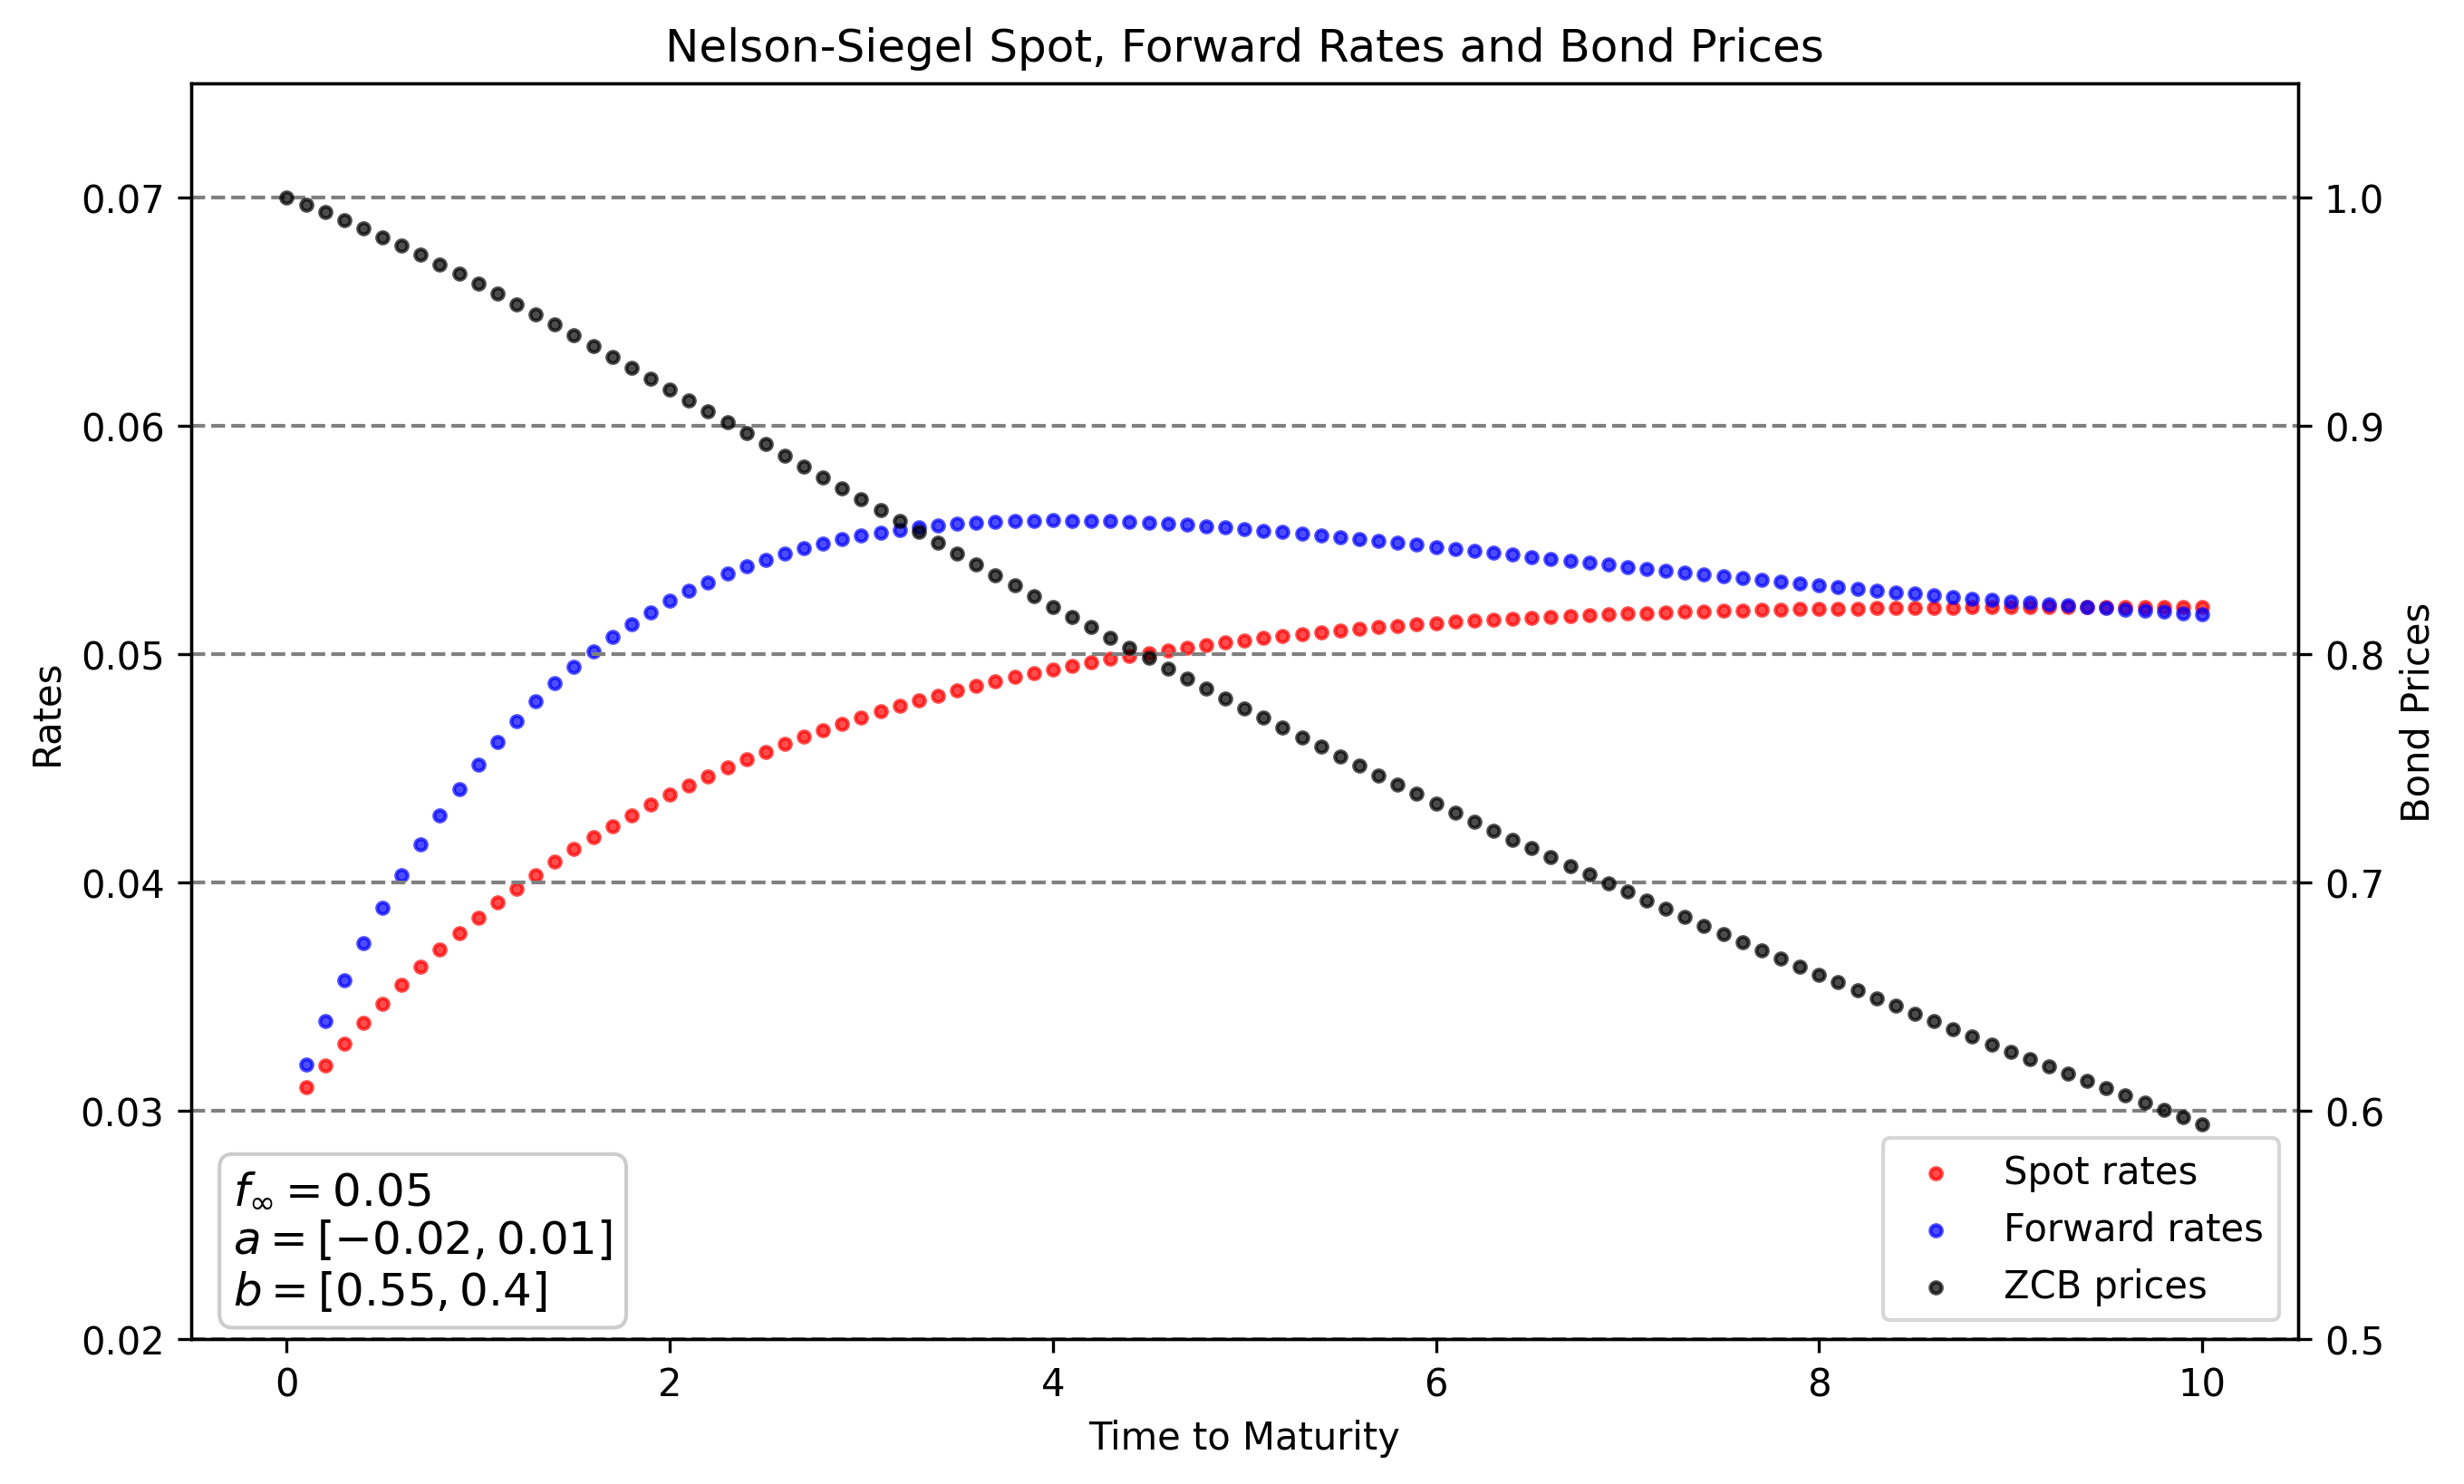

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

scatter1 = ax1.scatter(T[1:], R_plot[1:],marker = '.', label='Spot rates', alpha=0.7, color='red')
scatter2 = ax1.scatter(T[1:], f_plot[1:], marker = '.', label='Forward rates', alpha=0.7, color='blue')
ax1.set_ylim([0.02, 0.075])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# add dotted lines across the plot at 0.01, 0.02, 0.03, 0.04 and 0.05
ax1.yaxis.set_major_locator(MultipleLocator(base=0.01))
for tick in ax1.get_yticks():
    ax1.axhline(y=tick, color='gray', linestyle='--', linewidth=1)

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p_plot, label='ZCB prices', marker = '.', color='black', alpha=0.7)
ax2.set_ylim([0.5, 1.05])
ax2.yaxis.set_major_locator(MultipleLocator(base=0.1))
ax2.set_ylabel('Bond Prices')

textstr = f'$f_\infty={f_inf}$\n$a={a_star}$\n$b={b_star}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax1.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Nelson-Siegel Spot, Forward Rates and Bond Prices')
plt.show()
plt.close()

Certainly $K=3$ and $K=2$ both produce fine results when fitting while $K=1$ is not fitting well enough

#### (b) Plot the observed forward rates $f^*(T)$ in a separate plot and try to guess how many terms $K$ will at least need to be included in the fit. Also, based on the plot come up with a set of plausible parameter values so that $f(T)$ with your choice of parameters is likely to fit $f^*(T)$ for $K = 1$.

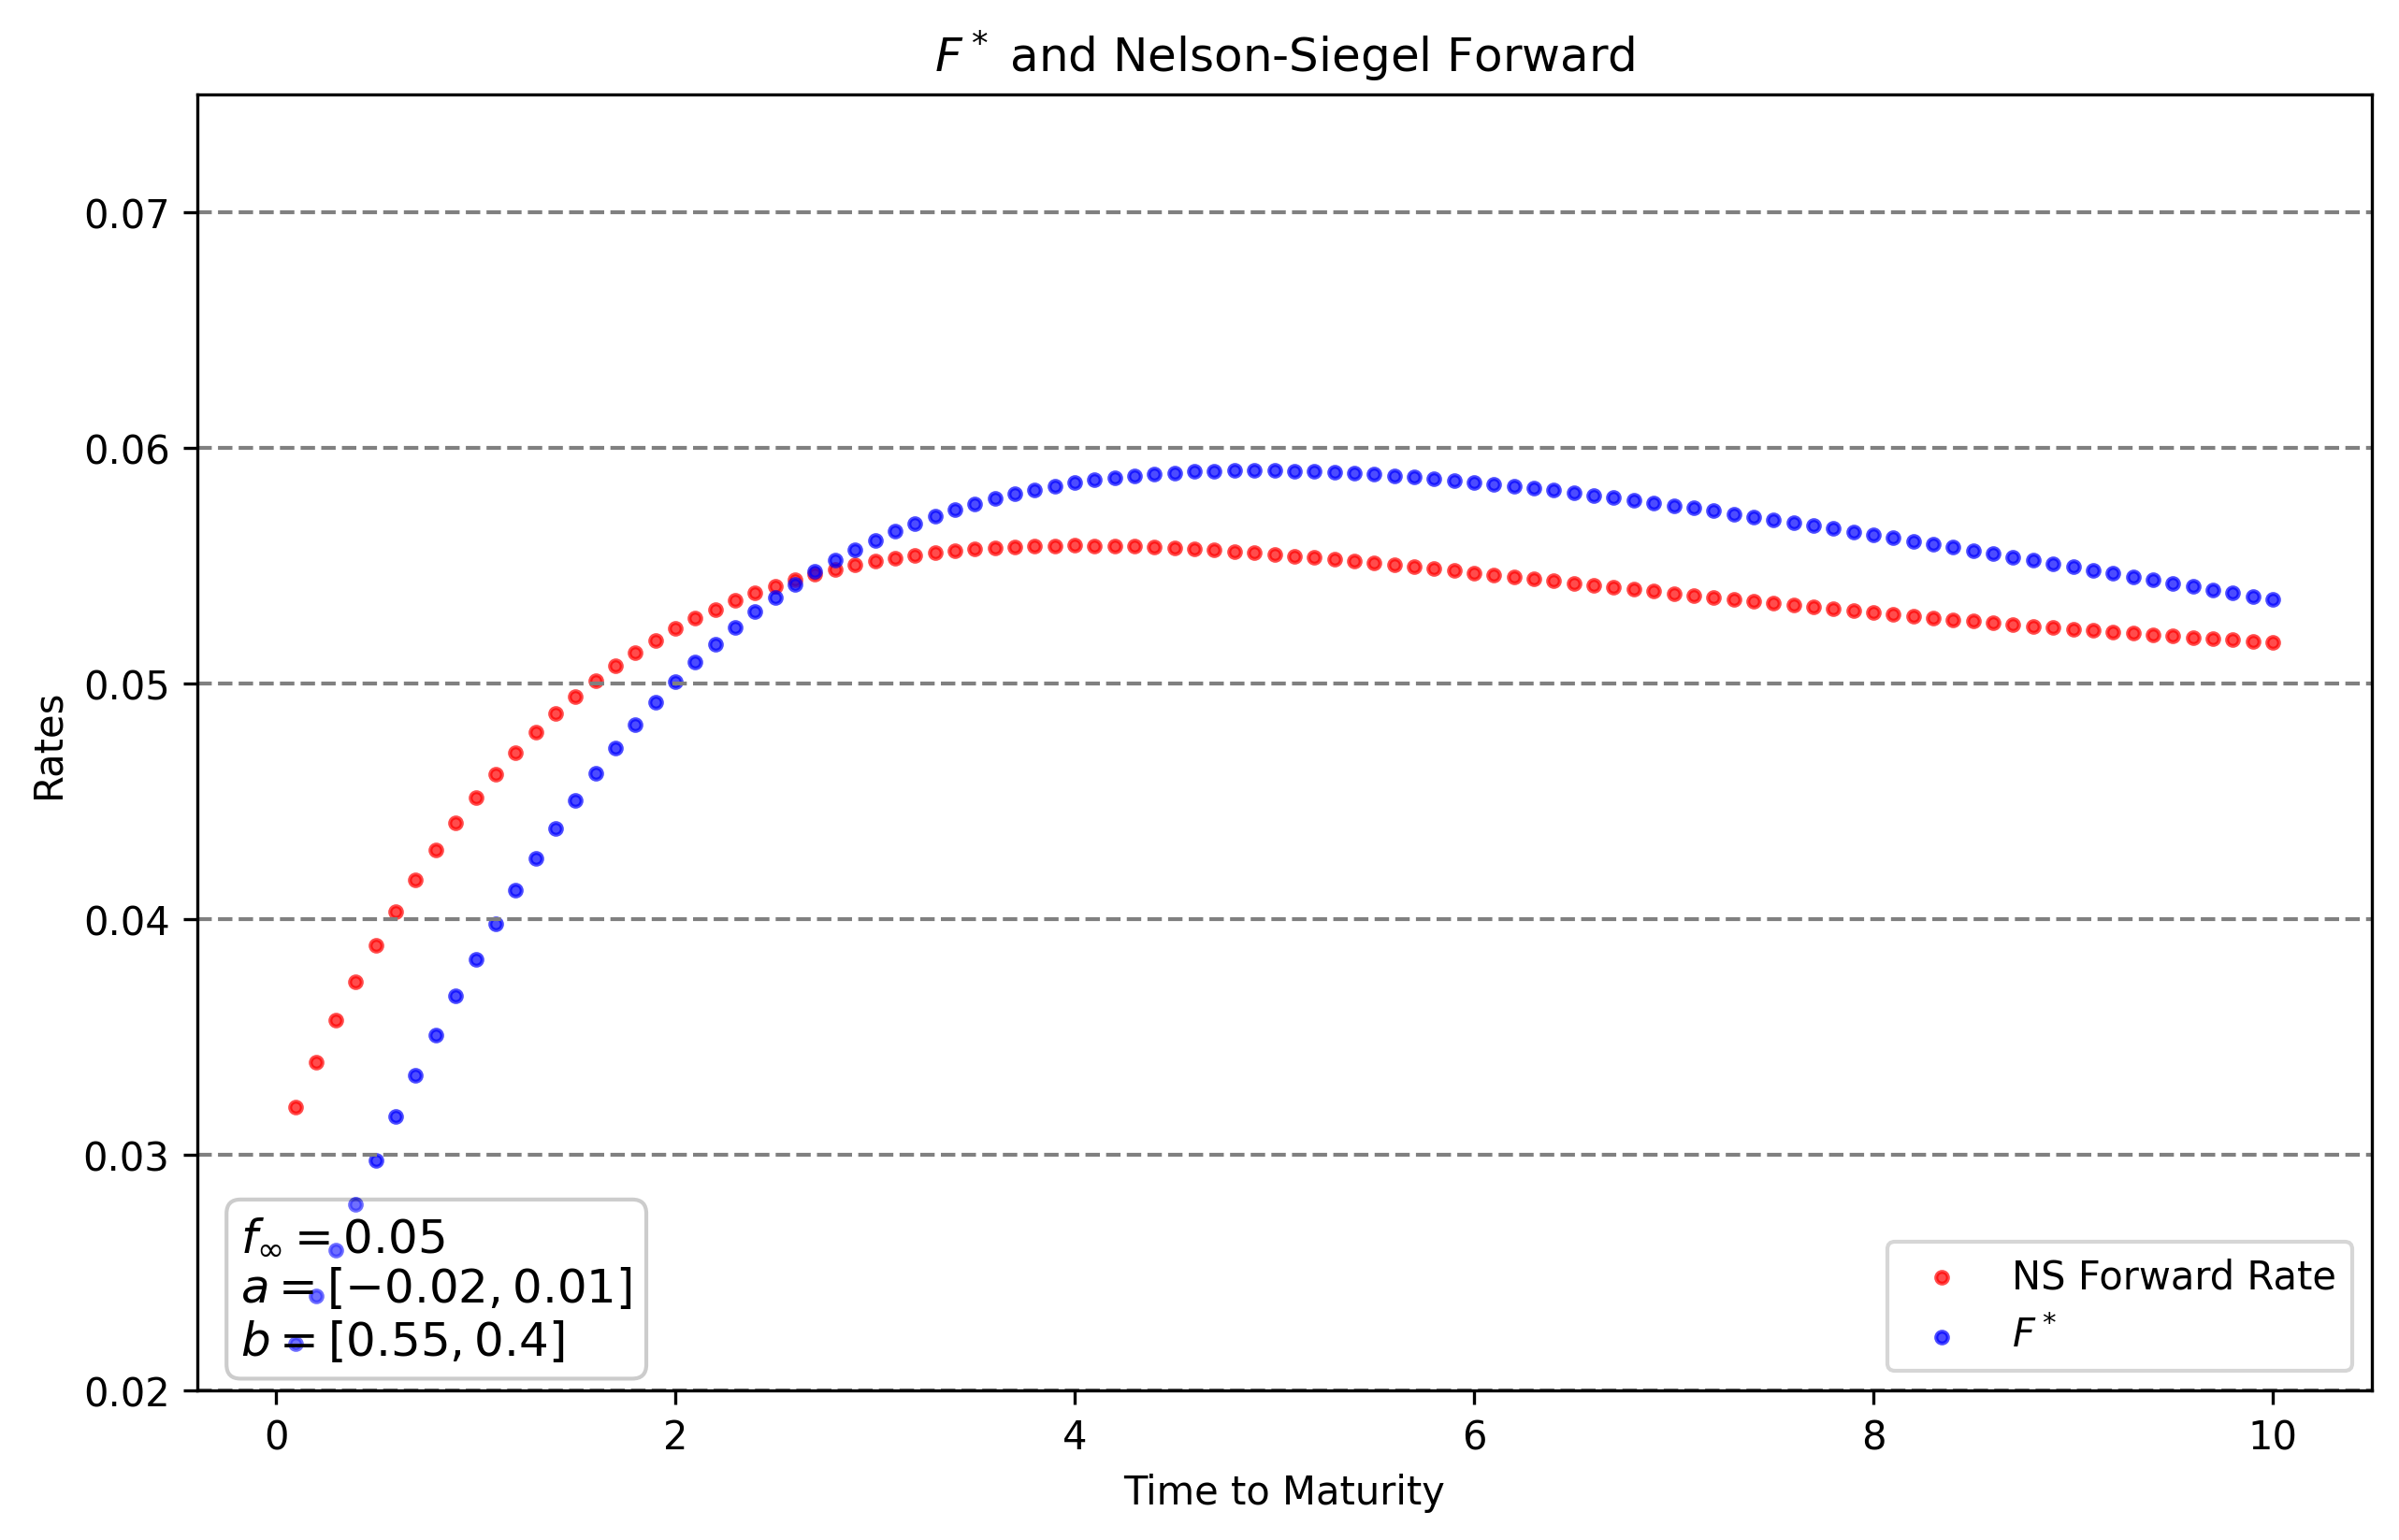

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

scatter1 = ax1.scatter(T[1:], f_plot[1:],marker = '.', label='NS Forward Rate', alpha=0.7, color='red')
scatter2 = ax1.scatter(T[1:], f_star[1:], marker = '.', label='$F^*$', alpha=0.7, color='blue')
ax1.set_ylim([0.02, 0.075])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# add dotted lines across the plot at 0.01, 0.02, 0.03, 0.04 and 0.05
ax1.yaxis.set_major_locator(MultipleLocator(base=0.01))
for tick in ax1.get_yticks():
    ax1.axhline(y=tick, color='gray', linestyle='--', linewidth=1)

# # Add bond prices to the plot on the right axis
# ax2 = ax1.twinx()
# scatter3 = ax2.scatter(T, p_plot, label='ZCB prices', marker = '.', color='black', alpha=0.7)
# ax2.set_ylim([0.5, 1.05])
# ax2.yaxis.set_major_locator(MultipleLocator(base=0.1))
# ax2.set_ylabel('Bond Prices')

textstr = f'$f_\infty={f_inf}$\n$a={a_star}$\n$b={b_star}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax1.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Combine legends
scatters = [scatter1, scatter2]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('$F^*$ and Nelson-Siegel Forward')
plt.show()
plt.close()

#### (c) Fit the function $f(T)$ to the observed values in $f^*(T)$ using `scipy.optimize` and the `nelder-mead` method. Your objective function should compute the total squared error between the fitted and observed values and hence, you should solve the following minimization problem $$ \min_{f_\infty,a^*,b^*} \sum_{i=1}^N (f^*(T_i) - f(T_i))^2 $$ Do your fit recursively for increasing values of $K$ starting with $K = 1$ and try to go up to no more than $K = 4$. Plot the fitted values $\hat{f}(T)$ versus the observed values $f^*(T)$ for the best fit you achieve.

In [7]:
# define the objective function
def forward_obj_ns(params, f_star, T): # nelson siegel
    N = int((len(params)-1)/2)
    f_inf, a, b = params[0], params[1:N+1], params[N+1:2*N+3]
    param_fit = f_inf, a, b
    # print(param_fit)
    M = len(T)
    f_fit = fid.f_ns(param_fit, T)
    y = 0
    for i in range(M):
        y += (f_fit[i] - f_star[i])**2
    return y

def forward_obj_ns_jac(params, f_star, T): # nelson siegel, minimizing jacobian
    N = int((len(params)-1)/2)
    f_inf, a, b = params[0], params[1:N+1], params[N+1:2*N+3]
    param_fit = f_inf, a, b
    M = len(T)
    f_fit = fid.f_ns(param_fit, T)
    jac = np.zeros(len(params))
    for i in range(M):
        jac += (f_fit[i] - f_star[i])*fid.f_ns_jac(param_fit, T[i])
    return jac

def forward_obj_ns_hess(params, f_star, T): # nelson siegel, minimizing hessian
    N = int((len(params)-1)/2)
    f_inf, a, b = params[0], params[1:N+1], params[N+1:2*N+3]
    param_fit = f_inf, a, b
    M = len(T)
    f_fit = fid.f_ns(param_fit, T)
    hess = np.zeros([len(params), len(params)])
    for i in range(M):
        f_deriv = fid.f_ns_jac(param_fit, T[i])
        hess += (f_fit[i] - f_star[i])*fid.f_ns_hess(param_fit, T[i]) + 2*np.outer(f_deriv, f_deriv)
    return hess

In [8]:
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,0.03,0.01 # must be in form of tuple/list/array
b_0 = 0.35,0.35,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

In [9]:
# for K=1
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,#0.03,0.01 # must be in form of tuple/list/array
b_0 = 0.35,#0.35,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

# unconstrained optimization
result = minimize(forward_obj_ns, param_0, args=(f_star, T), method='nelder-mead', options={'disp': False})
f_inf_hat, a_hat, b_hat, sse = result.x[0], result.x[1:1+K+1], result.x[K+2:K+2+K+1], result.fun
print(f'results:\n',
      f'f_inf: {f_inf_hat}\n',
      f'a: {a_hat}\n',
      f'b: {b_hat}')
f_fit = fid.f_ns((f_inf_hat, a_hat, b_hat), T)
res = f_star - f_fit

results:
 f_inf: 0.0575495106100254
 a: [-0.04114241]
 b: [0.86656465]


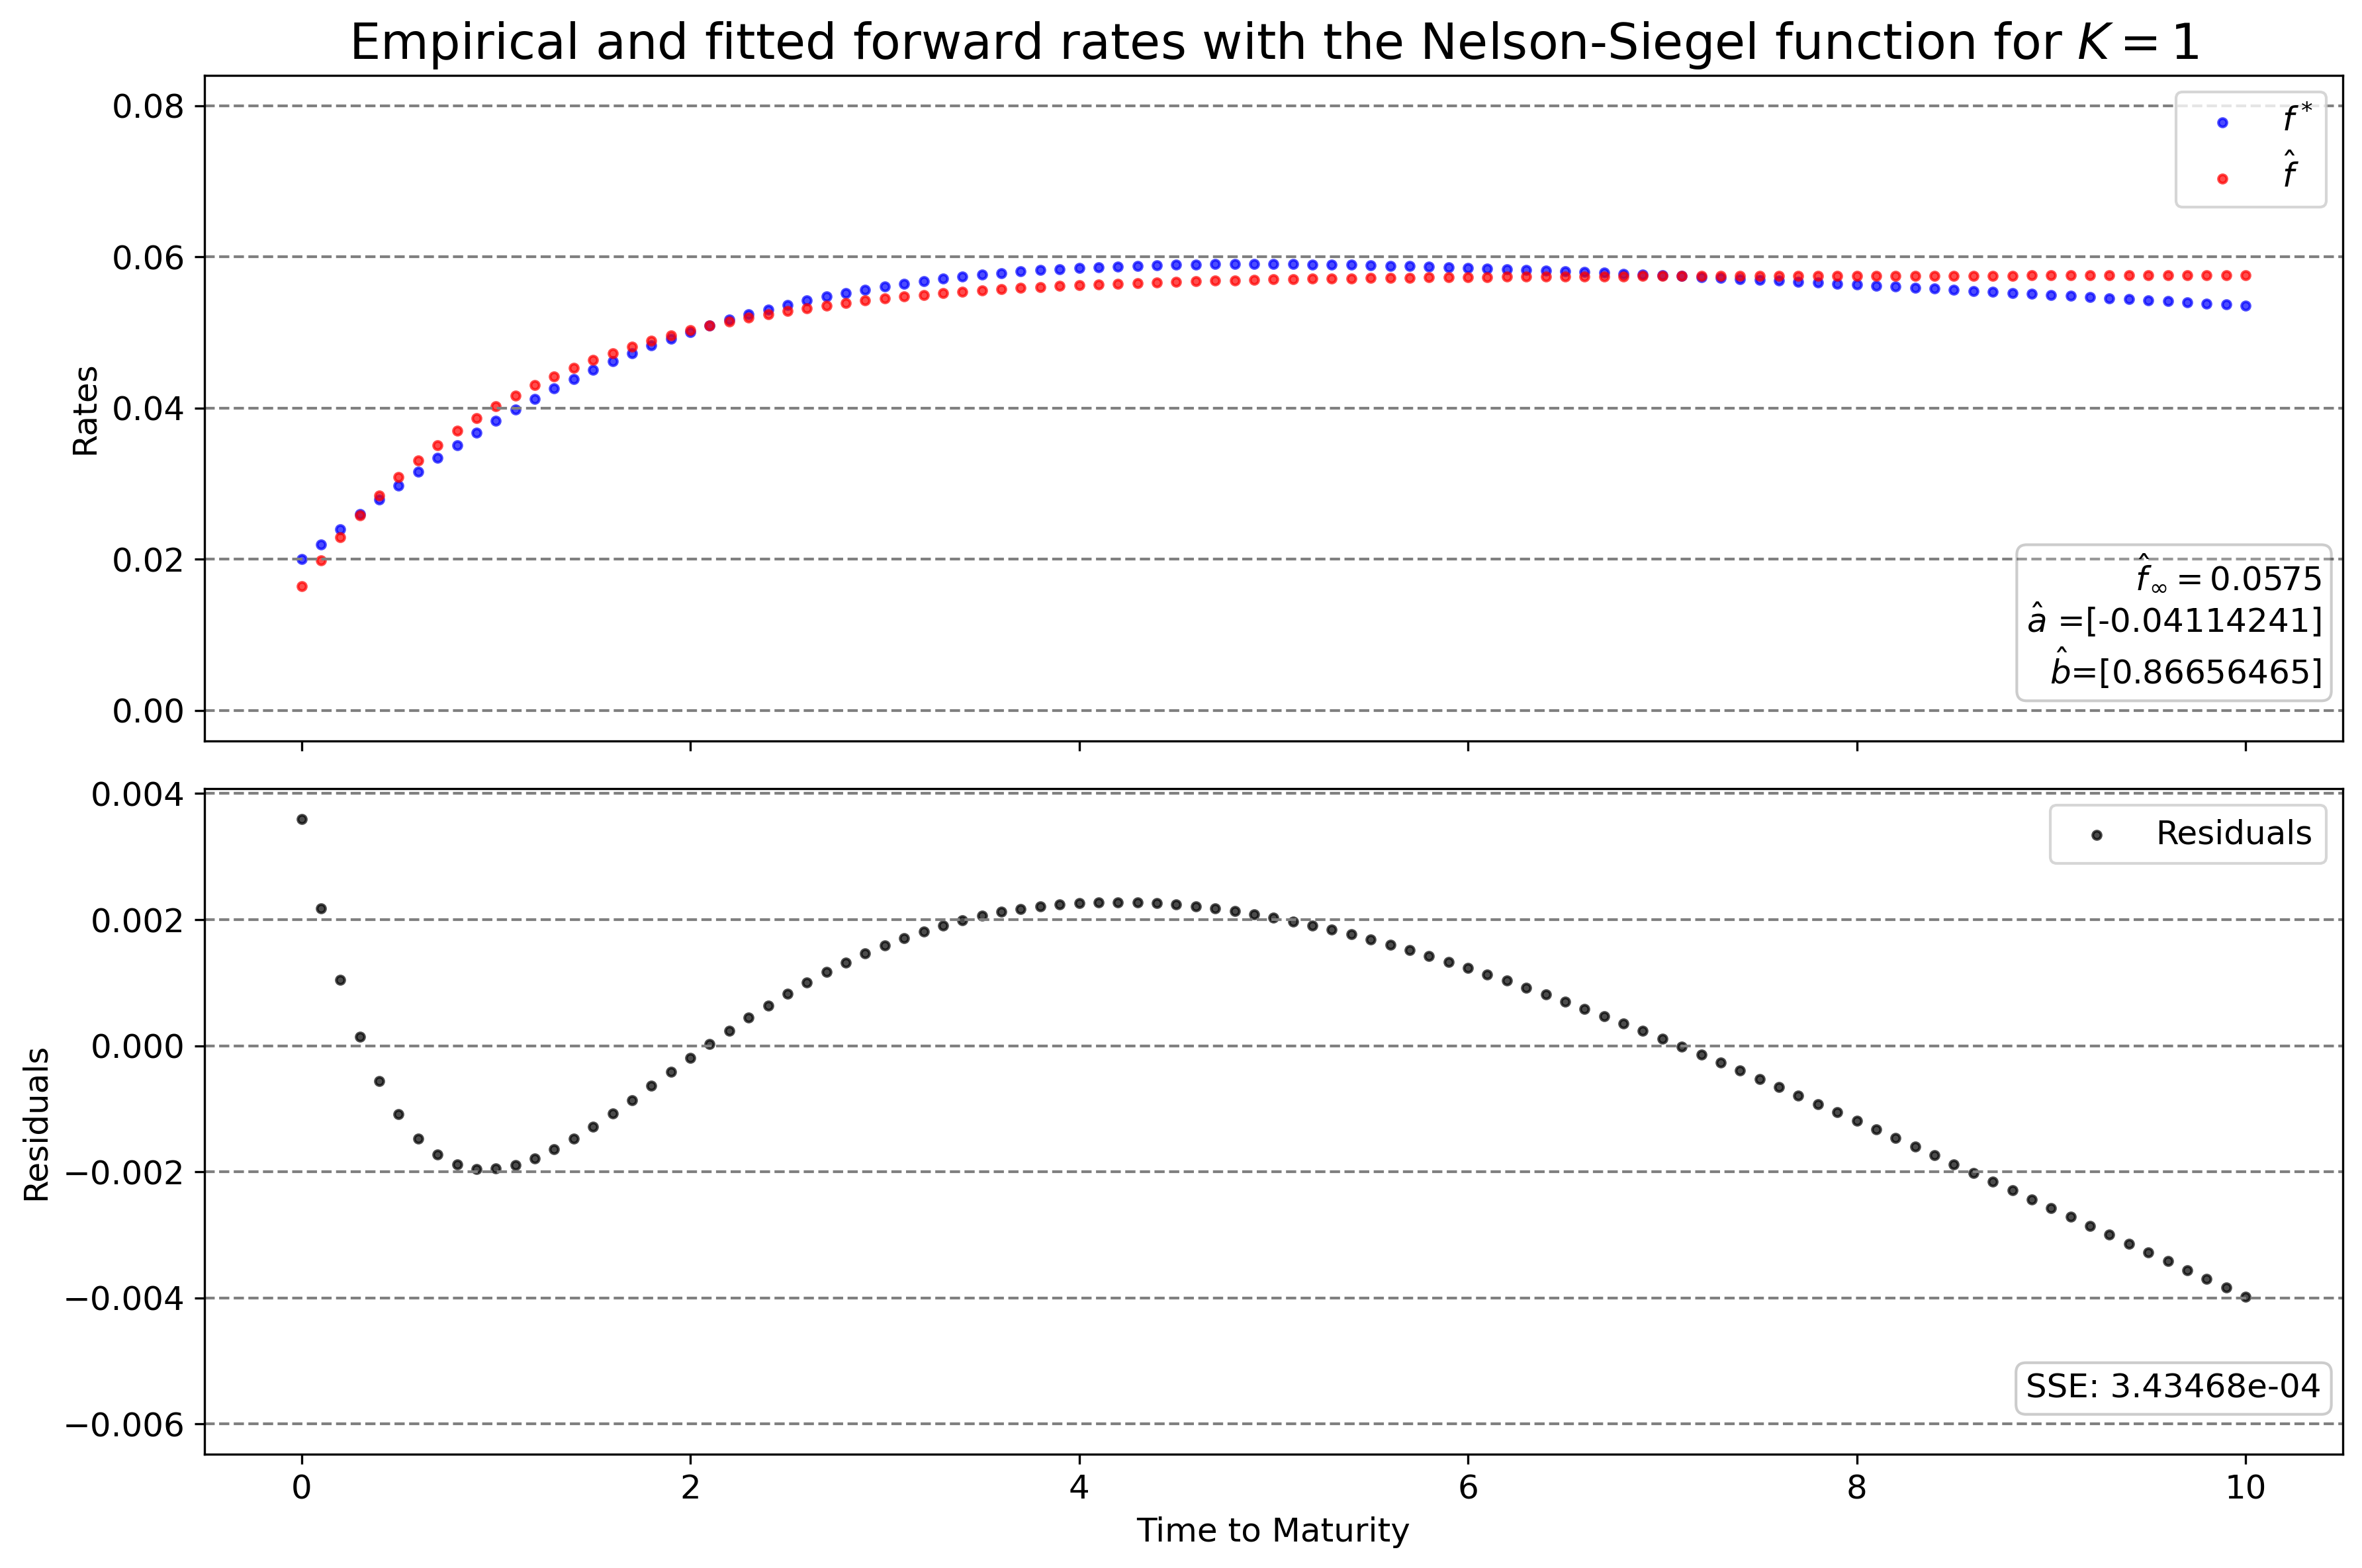

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: forward rates
ax[0].scatter(T, f_star, label='$f^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, f_fit, label='$\hat{f}$', marker='.', color='red', alpha=0.7)

ax[0].yaxis.set_major_locator(MultipleLocator(base=0.02))
for tick in ax[0].get_yticks():
    ax[0].axhline(y=tick, color='gray', linestyle='--', linewidth=1)
ax[0].set_ylabel('Rates', fontsize=12)

ax[0].legend(fontsize=12)
textstr = f'$\hat f_\infty =${f_inf_hat:.4f}\n$\hat a$ ={a_hat}\n$\hat b $={b_hat}'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.99, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom',horizontalalignment = 'right', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)

# Create horizontal lines dynamically based on the range
max_residual = np.max(np.abs(res))
base1 = 2*10 ** (int(np.log10(max_residual))-1)
ax[1].yaxis.set_major_locator(MultipleLocator(base=base1))
for tick in ax[1].get_yticks():
    ax[1].axhline(y=tick, color='gray', linestyle='--', linewidth=1)

ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12, loc='upper right')

# calculate the mse of the residuals
txt_sse = f'SSE: {sse:.5e}'
ax[1].text(0.99, 0.075, txt_sse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'right', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


ax[0].set_title(f'Empirical and fitted forward rates with the Nelson-Siegel function for $K = {K+1}$', fontsize=18)
plt.tight_layout()
plt.show()
plt.close()

In [11]:
# for K=2
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,0.03#,0.01 # must be in form of tuple/list/array
b_0 = 0.35,0.35#,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

# unconstrained optimization
result = minimize(forward_obj_ns, param_0, args=(f_star, T), method='nelder-mead', options={'disp': False})
f_inf_hat, a_hat, b_hat, sse = result.x[0], result.x[1:1+K+1], result.x[K+2:K+2+K+1], result.fun
print(f'results:\n',
      f'f_inf: {f_inf_hat}\n',
      f'a: {a_hat}\n',
      f'b: {b_hat}')
f_fit = fid.f_ns((f_inf_hat, a_hat, b_hat), T)
res = f_star - f_fit

results:
 f_inf: 0.04676151292122524
 a: [-0.02771372  0.01628986]
 b: [0.31856013 0.30158209]


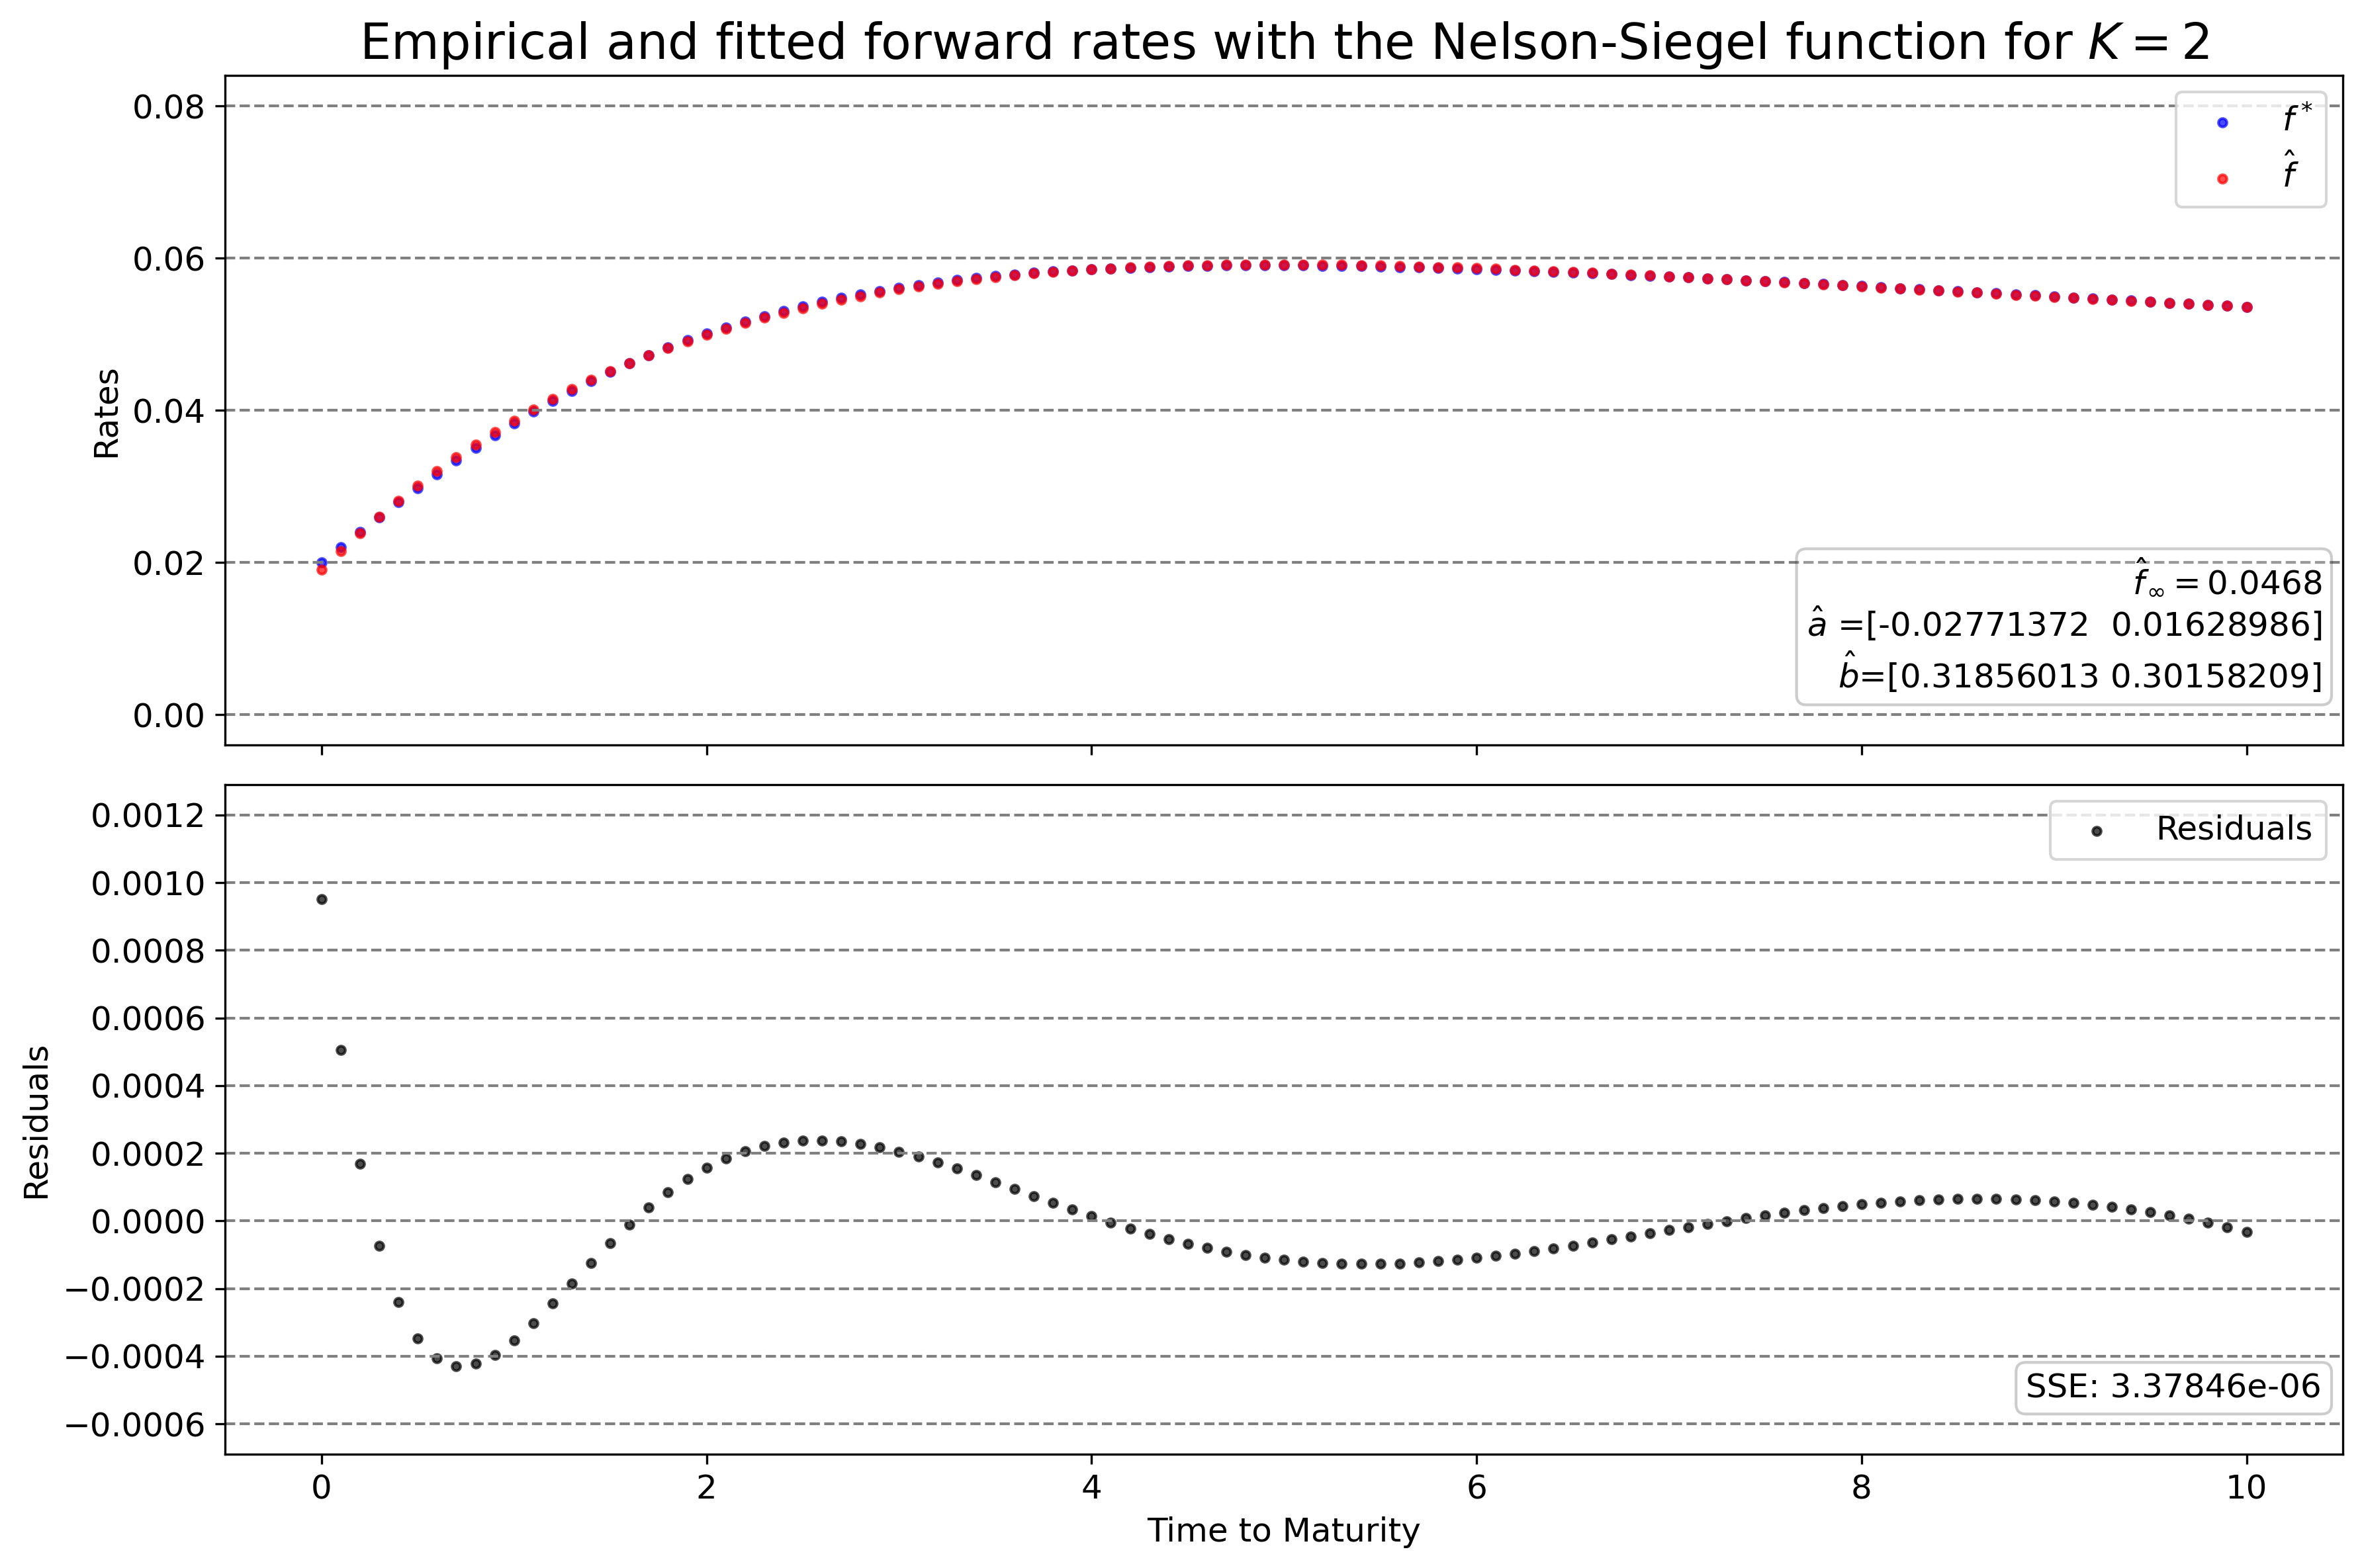

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: forward rates
ax[0].scatter(T, f_star, label='$f^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, f_fit, label='$\hat{f}$', marker='.', color='red', alpha=0.7)

ax[0].yaxis.set_major_locator(MultipleLocator(base=0.02))
for tick in ax[0].get_yticks():
    ax[0].axhline(y=tick, color='gray', linestyle='--', linewidth=1)
ax[0].set_ylabel('Rates', fontsize=12)

ax[0].legend(fontsize=12)
textstr = f'$\hat f_\infty =${f_inf_hat:.4f}\n$\hat a$ ={a_hat}\n$\hat b $={b_hat}'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.99, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom',horizontalalignment = 'right', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)

# Create horizontal lines dynamically based on the range
max_residual = np.max(np.abs(res))
base1 = 2*10 ** (int(np.log10(max_residual))-1)
ax[1].yaxis.set_major_locator(MultipleLocator(base=base1))
for tick in ax[1].get_yticks():
    ax[1].axhline(y=tick, color='gray', linestyle='--', linewidth=1)

ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12, loc='upper right')

# calculate the mse of the residuals
txt_sse = f'SSE: {sse:.5e}'
ax[1].text(0.99, 0.075, txt_sse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'right', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


ax[0].set_title(f'Empirical and fitted forward rates with the Nelson-Siegel function for $K = {K+1}$', fontsize=18)
plt.tight_layout()
plt.show()
plt.close()

In [13]:
# for K=3
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,0.03,0.01 # must be in form of tuple/list/array
b_0 = 0.35,0.35,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

# unconstrained optimization
result = minimize(forward_obj_ns, param_0, args=(f_star, T), method='nelder-mead', options={'disp': False})
f_inf_hat, a_hat, b_hat, sse = result.x[0], result.x[1:1+K+1], result.x[K+2:K+2+K+1], result.fun
print(f'results:\n',
      f'f_inf: {f_inf_hat}\n',
      f'a: {a_hat}\n',
      f'b: {b_hat}')
f_fit = fid.f_ns((f_inf_hat, a_hat, b_hat), T)
res = f_star - f_fit

results:
 f_inf: 0.04684946368869383
 a: [-0.02736671  0.0153077  -0.01621029]
 b: [0.3495856  0.30029607 3.75891298]


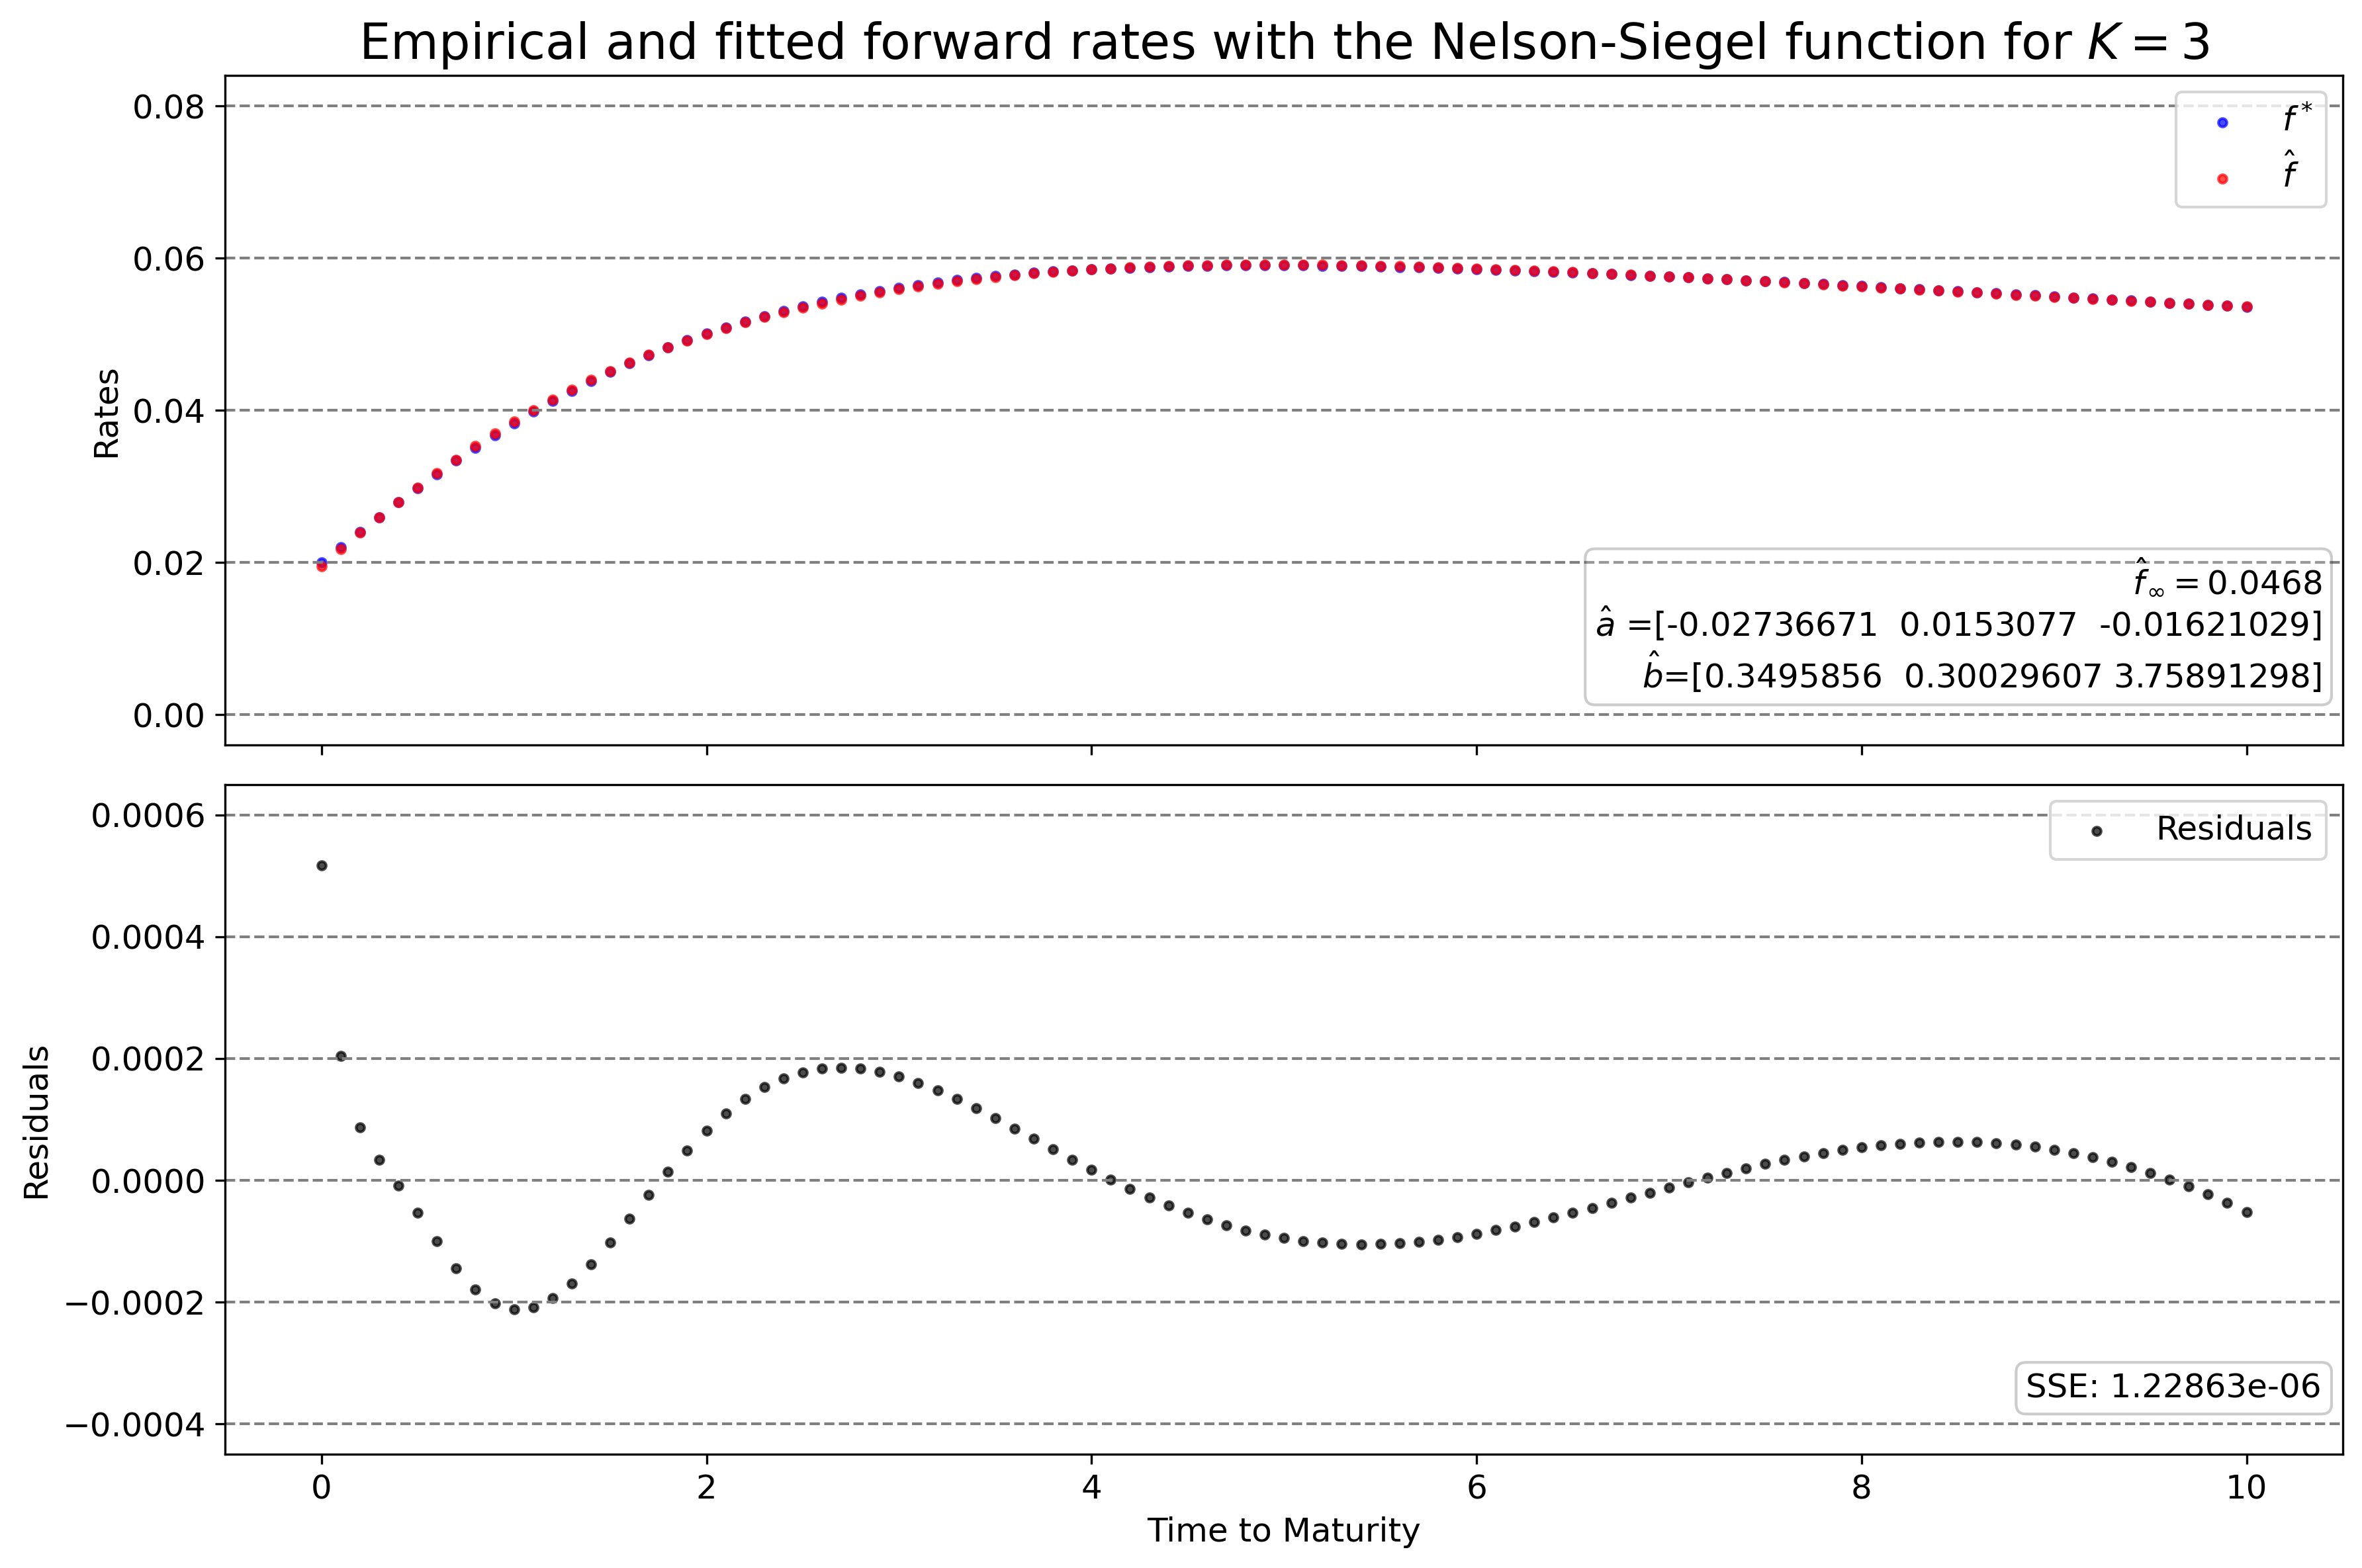

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: forward rates
ax[0].scatter(T, f_star, label='$f^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, f_fit, label='$\hat{f}$', marker='.', color='red', alpha=0.7)

ax[0].yaxis.set_major_locator(MultipleLocator(base=0.02))
for tick in ax[0].get_yticks():
    ax[0].axhline(y=tick, color='gray', linestyle='--', linewidth=1)
ax[0].set_ylabel('Rates', fontsize=12)

ax[0].legend(fontsize=12)
textstr = f'$\hat f_\infty =${f_inf_hat:.4f}\n$\hat a$ ={a_hat}\n$\hat b $={b_hat}'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.99, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom',horizontalalignment = 'right', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)

# Create horizontal lines dynamically based on the range
max_residual = np.max(np.abs(res))
base1 = 2*10 ** (int(np.log10(max_residual))-1)
ax[1].yaxis.set_major_locator(MultipleLocator(base=base1))
for tick in ax[1].get_yticks():
    ax[1].axhline(y=tick, color='gray', linestyle='--', linewidth=1)

ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12, loc='upper right')

# calculate the mse of the residuals
txt_sse = f'SSE: {sse:.5e}'
ax[1].text(0.99, 0.075, txt_sse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'right', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


ax[0].set_title(f'Empirical and fitted forward rates with the Nelson-Siegel function for $K = {K+1}$', fontsize=18)
plt.tight_layout()
plt.show()
plt.close()

#### (d) Given your choice of $K$ and preferred parameter estimates, find the function $\Theta(t)$ in the drift of the Ho-Lee model using that $$ \Theta(t) = \frac{\partial f^*(0,t)}{\partial T} + \sigma^2 t $$ where $\frac{\partial f^*(0,t)}{\partial T}$ is the derivative in the second argument of $f^*$ evaluated at $(0,t)$.

In [15]:
param_2d = (f_inf_hat, a_hat, b_hat, sigma)
theta_2d = fid.theta_ho_lee(T,param_2d, method = 'nelson_siegel')